In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
sys.path.append(os.path.abspath('../Dataset'))
sys.path.append(os.path.abspath('..'))

import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

train_procesado = pd.read_csv('../Dataset/Procesado/train_procesado.csv')
train_completo = pd.read_csv('../Dataset/Procesado/train_completo.csv')

val_procesado = pd.read_csv('../Dataset/Procesado/val_procesado.csv')
val_completo = pd.read_csv('../Dataset/Procesado/val_completo.csv')


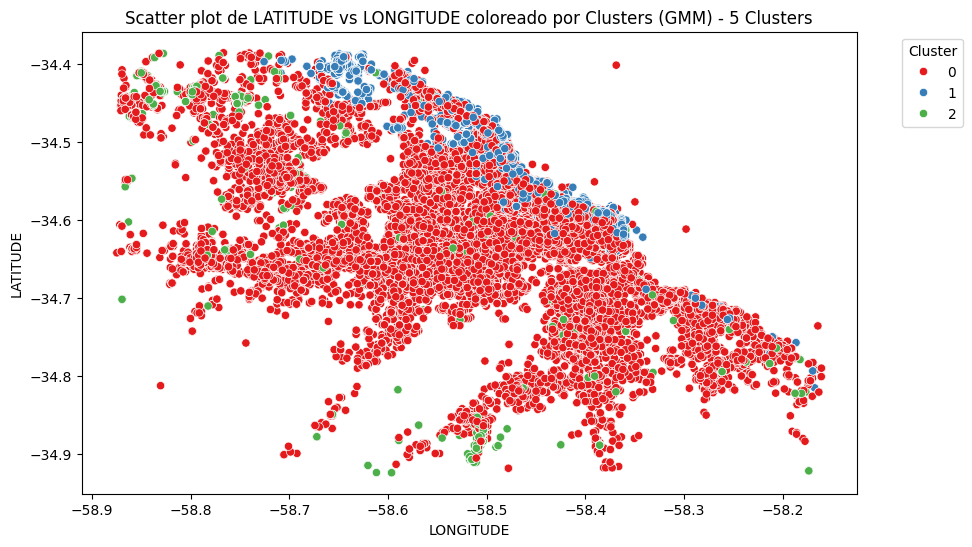

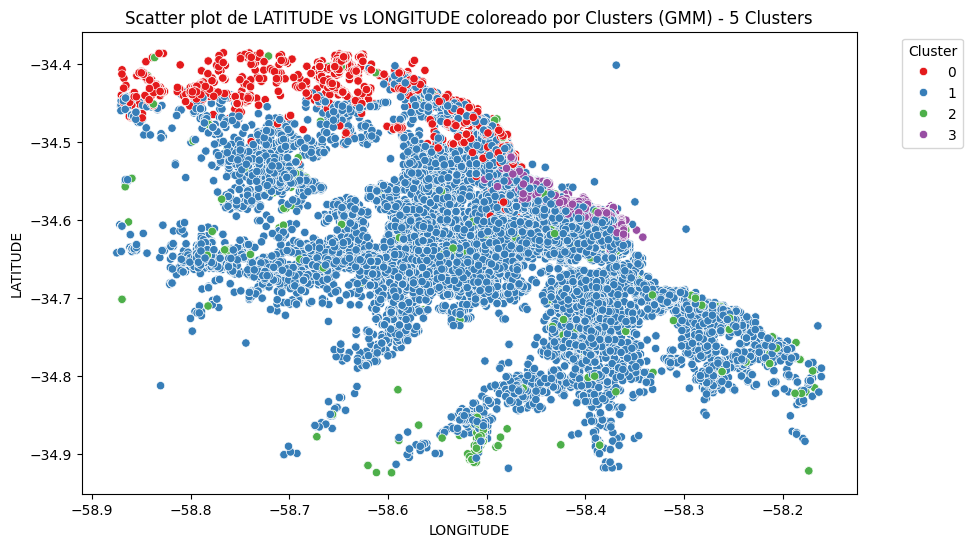

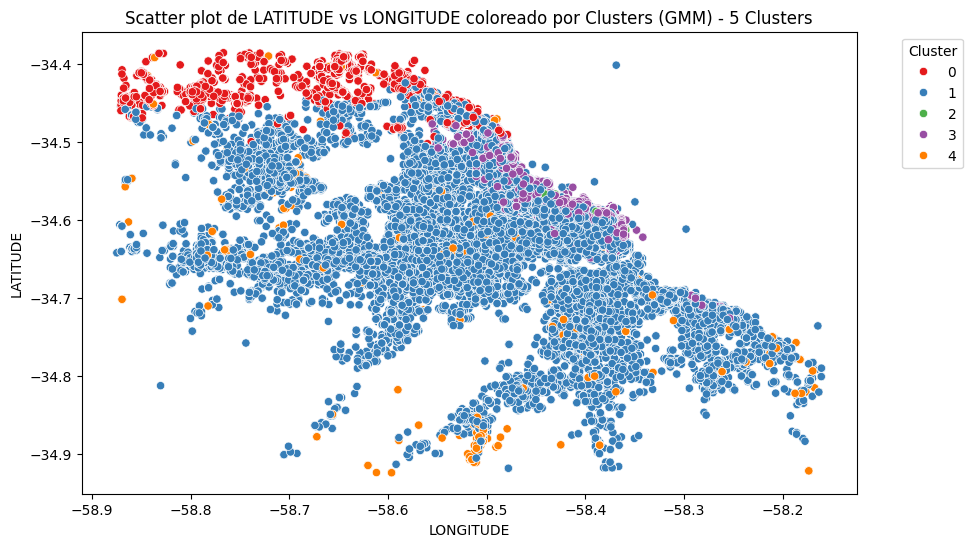

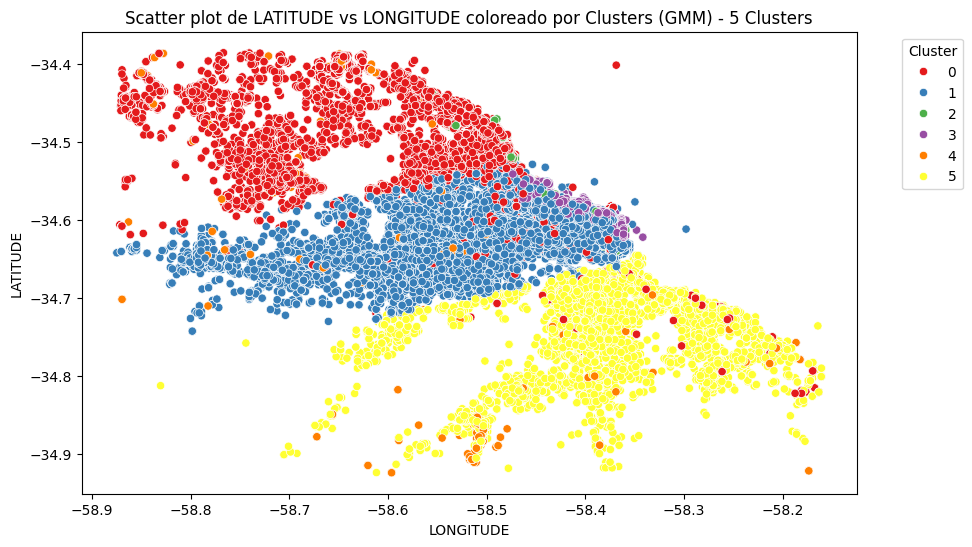

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar las columnas relevantes para el clustering
X = train_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definir los números de clusters a probar
num_clusters = [3, 4, 5, 6]

# Crear un gráfico para cada número de clusters
for n_clusters in num_clusters:
    # Aplicar GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', reg_covar=1e-6, random_state=42)
    train_completo['cluster'] = gmm.fit_predict(X_scaled)
    
    # Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por cluster
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(x=train_completo['LONGITUDE'],
                                y=train_completo['LATITUDE'], 
                                hue=train_completo['cluster'], 
                                palette='Set1')  # Usar la paleta Set1 para colores distintos

    plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Clusters (GMM) - 5 Clusters')
    plt.xlabel('LONGITUDE')
    plt.ylabel('LATITUDE')


    # Mostrar la leyenda
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Mostrar el gráfico
    plt.show()


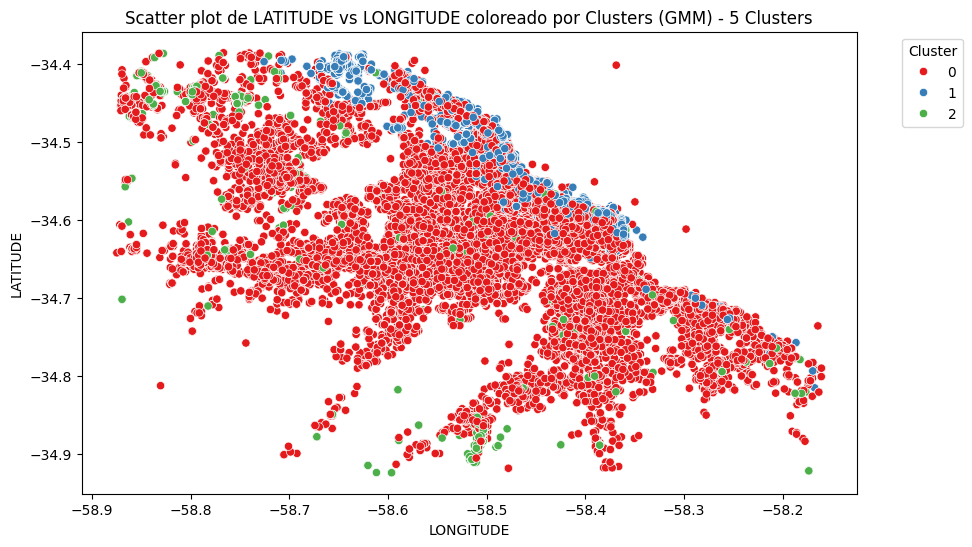

In [4]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# Seleccionar las columnas relevantes para el clustering
X = train_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar GMM clustering con 5 clusters
gmm = GaussianMixture(n_components=3, covariance_type='full', reg_covar=1e-6, random_state=42)

train_completo['cluster'] = gmm.fit_predict(X_scaled)

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_completo['LONGITUDE'],
                               y=train_completo['LATITUDE'], 
                               hue=train_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Clusters (GMM) - 5 Clusters')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')


# Mostrar la leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_36290/2494145728.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)


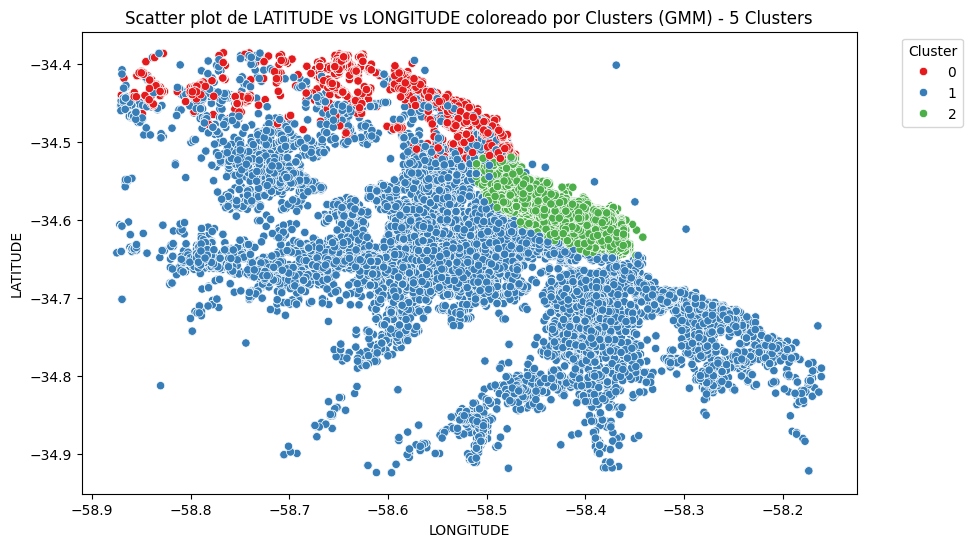

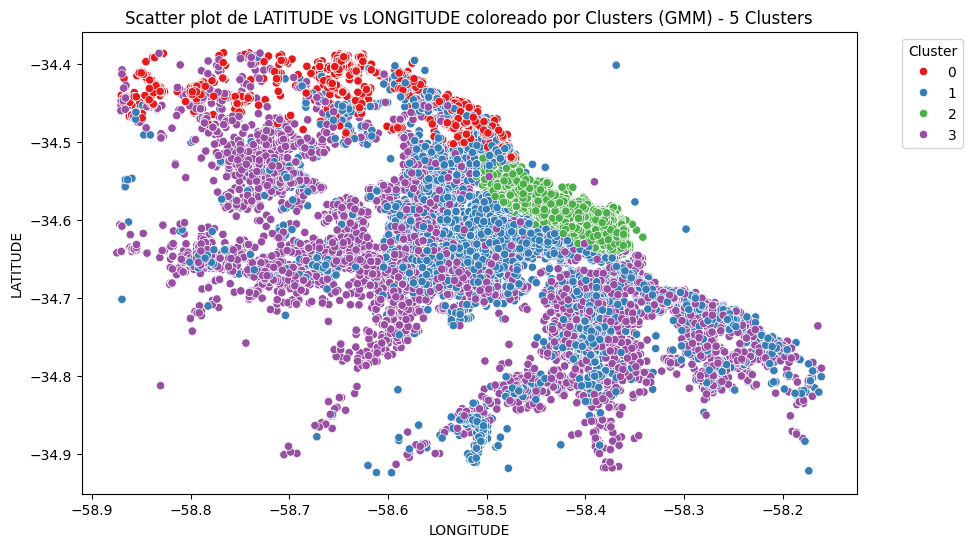

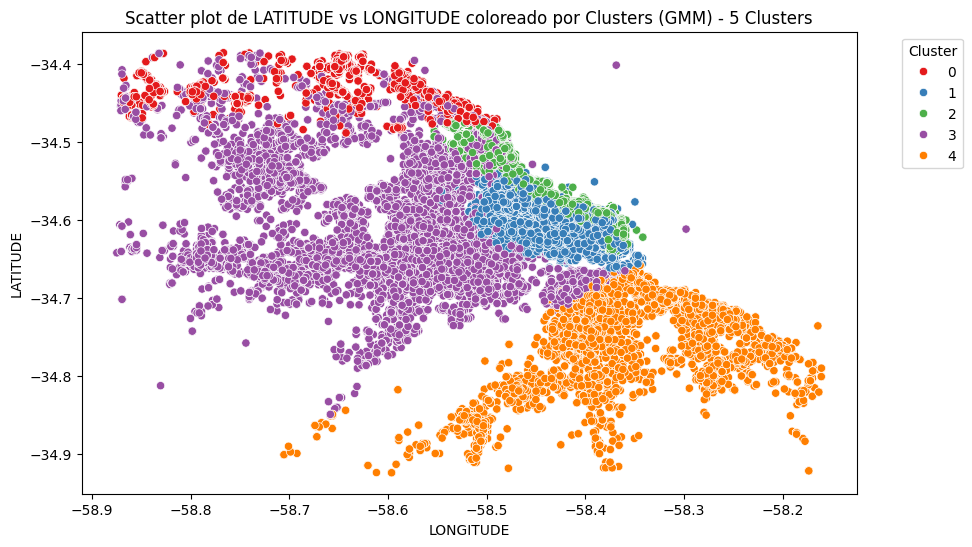

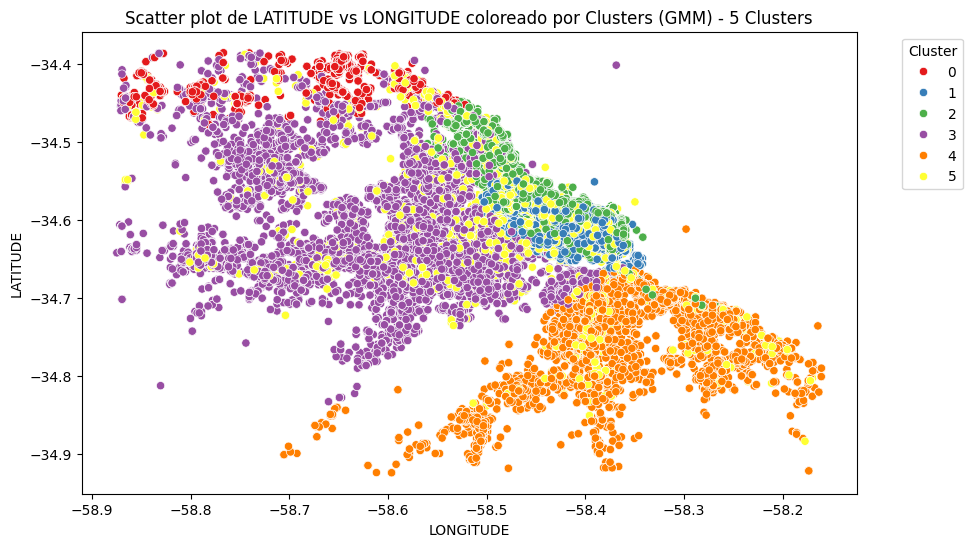

In [5]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = train_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Dividir la columna 'precio_pesos_constantes' en 5 categorías usando pd.qcut
X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['LATITUDE', 'LONGITUDE', 'precio_categoria']])

# Definir los números de clusters a probar
num_clusters = [3, 4, 5, 6]

# Crear un gráfico para cada número de clusters
for n_clusters in num_clusters:
    # Aplicar GMM clustering
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', reg_covar=1e-6, random_state=42)
    train_completo['cluster'] = gmm.fit_predict(X_scaled)
    
    # Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por cluster
    plt.figure(figsize=(10, 6))
    scatter_plot = sns.scatterplot(x=train_completo['LONGITUDE'],
                                y=train_completo['LATITUDE'], 
                                hue=train_completo['cluster'], 
                                palette='Set1')  # Usar la paleta Set1 para colores distintos

    plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Clusters (GMM) - 5 Clusters')
    plt.xlabel('LONGITUDE')
    plt.ylabel('LATITUDE')

    # Mostrar la leyenda
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Mostrar el gráfico
    plt.show()


In [6]:
# from sklearn.metrics import silhouette_score

# # Calcular el silhouette score
# sil_score = silhouette_score(X_scaled, train_completo['cluster'])
# print(f'Silhouette Score: {sil_score:.2f}')


cluster
0    104194
1     35340
2     23952
4     19046
3      1444
Name: count, dtype: int64


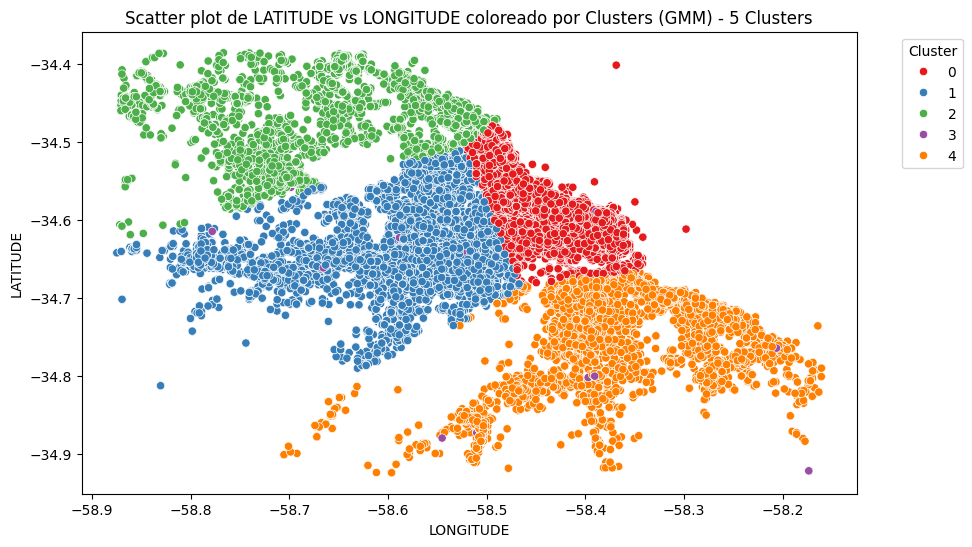

In [7]:
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Supongamos que train_completo es tu DataFrame
X = train_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar MiniBatchKMeans clustering con 5 clusters
mbk = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000)
train_completo['cluster'] = mbk.fit_predict(X_scaled)

# Verificar los resultados de MiniBatchKMeans
print(train_completo['cluster'].value_counts())

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreando por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_completo['LONGITUDE'],
                               y=train_completo['LATITUDE'], 
                               hue=train_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Clusters (GMM) - 5 Clusters')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')


# Mostrar la leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [8]:
# import folium
# from folium.plugins import FastMarkerCluster
# from sklearn.mixture import GaussianMixture
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import seaborn as sns

# # Coordenadas aproximadas de Buenos Aires
# lat_buenos_aires = -34.6037
# lon_buenos_aires = -58.3816

# # Crear las categorías de precios usando pd.qcut
# labels = ['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto']
# train_completo['precio_categoria'] = pd.qcut(train_completo['precio_pesos_constantes'], q=5, labels=labels)

# # Seleccionar las columnas relevantes para el clustering
# X = train_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# # Normalizar los datos
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']])

# # Definir el número de clusters (5 en este caso)
# n_clusters = 5

# # Aplicar GMM clustering
# gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', reg_covar=1e-6, random_state=42)
# train_completo['cluster'] = gmm.fit_predict(X_scaled)

# # Crear un mapa centrado en Buenos Aires con zoom específico
# m = folium.Map(location=[lat_buenos_aires, lon_buenos_aires], 
#                zoom_start=12, 
#                tiles='CartoDB positron',  # Otras opciones de tiles
#                attr='CartoDB tiles under CC BY 3.0. Data by OpenStreetMap contributors.',
#                width="100%", 
#                height="100%")

# # Asignar colores para cada categoría de precios
# precio_colores = {
#     'Muy Bajo': 'blue',
#     'Bajo': 'green',
#     'Medio': 'orange',
#     'Alto': 'red',
#     'Muy Alto': 'purple'
# }

# # Crear una lista de las ubicaciones de los puntos y sus colores
# locations = []
# for i in range(len(train_completo)):
#     # Obtener el color según la categoría de precio
#     precio_categoria = train_completo.loc[i, 'precio_categoria']
#     precio_color = precio_colores[precio_categoria]
    
#     # Añadir las ubicaciones y su color a la lista de ubicaciones
#     locations.append([
#         train_completo.loc[i, 'LATITUDE'], 
#         train_completo.loc[i, 'LONGITUDE'],
#         precio_color  # Usamos el color de precio para la visualización
#     ])

# # Usar FastMarkerCluster para optimizar el rendimiento con un radio más pequeño
# marker_cluster =  (
#     locations, 
#     maxClusterRadius=20  # Ajusta el valor para hacer los grupos más pequeños
# ).add_to(m)

# # Crear leyenda para los colores de precios
# legend_html = '''
# <div style="position: fixed; 
#             bottom: 50px; left: 50px; width: 150px; height: 150px; 
#             border:2px solid grey; background-color: white; z-index:9999;
#             font-size:14px; font-family: Arial;">
#     <b>Precio</b><br>
#     <div style="background-color: blue; width: 20px; height: 20px; float: left;"></div> Muy Bajo<br>
#     <div style="background-color: green; width: 20px; height: 20px; float: left;"></div> Bajo<br>
#     <div style="background-color: orange; width: 20px; height: 20px; float: left;"></div> Medio<br>
#     <div style="background-color: red; width: 20px; height: 20px; float: left;"></div> Alto<br>
#     <div style="background-color: purple; width: 20px; height: 20px; float: left;"></div> Muy Alto<br>
# </div>
# '''
# m.get_root().html.add_child(folium.Element(legend_html))

# # Mostrar el mapa
# m.save('mapa_buenos_aires_clusters_con_precios.html')



/tmp/ipykernel_36290/2863035733.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)


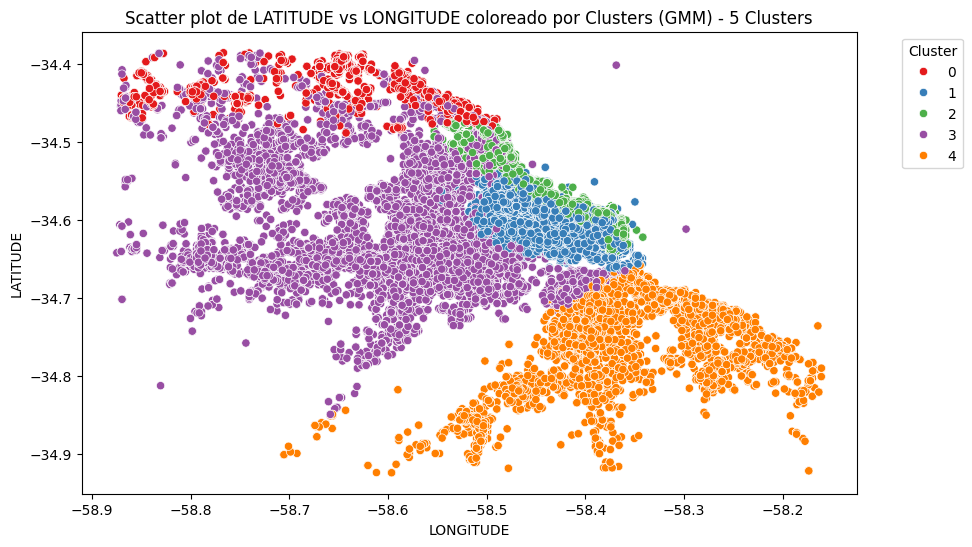

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Seleccionar las columnas relevantes para el clustering
X = train_completo[['LATITUDE', 'LONGITUDE', 'precio_pesos_constantes']]

# Dividir la columna 'precio_pesos_constantes' en 5 categorías usando pd.qcut
X['precio_categoria'] = pd.qcut(X['precio_pesos_constantes'], q=5, labels=False)

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['LATITUDE', 'LONGITUDE', 'precio_categoria']])

# Aplicar GMM clustering con 5 clusters
gmm = GaussianMixture(n_components=5, covariance_type='full', reg_covar=1e-6, random_state=42)
train_completo['cluster'] = gmm.fit_predict(X_scaled)

# Crear un scatter plot de LATITUDE y LONGITUDE, coloreado por cluster
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=train_completo['LONGITUDE'],
                               y=train_completo['LATITUDE'], 
                               hue=train_completo['cluster'], 
                               palette='Set1')  # Usar la paleta Set1 para colores distintos

plt.title('Scatter plot de LATITUDE vs LONGITUDE coloreado por Clusters (GMM) - 5 Clusters')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')

# Mostrar la leyenda
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()


In [16]:
import seaborn as sns

# Obtener los primeros 5 colores de la paleta Set1
cluster_colors = sns.color_palette('Set1', 5).as_hex()
import folium
import pandas as pd

# Supongamos que train_completo es tu DataFrame
# Convertir la columna 'cluster' a enteros
train_completo['cluster'] = train_completo['cluster'].astype(int)

# Crear un mapa centrado en la ubicación promedio
m = folium.Map(location=[train_completo['LATITUDE'].mean(), train_completo['LONGITUDE'].mean()], zoom_start=12)

# Añadir los CircleMarkers al mapa
for idx, row in train_completo.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=1,  # Tamaño del marcador
        color=cluster_colors[int(row['cluster'])],  # Asignar color según el cluster
        fill=True,
        fill_color=cluster_colors[int(row['cluster'])],  # Llenar el marcador con el mismo color
        fill_opacity=0.7
    ).add_to(m)

m.fit_bounds([[-35, -59], [-34.3, -58.1]])
# Mostrar el mapa
m.save("mapa_clusters.html")
